***
# MARKET ANALYSIS
***

## 1. Description

#### 1.1 Introduction:

The analysis aims to assess the effectiveness of Campaign Type C specifically for the departments that contribute to the bottom 25% of revenue in the Regork company. This evaluation is crucial as it can provide valuable insights into the return on investment (ROI) for Campaign Type C and help the Regork CEO make data-driven decisions. By identifying the impact of this campaign on departments with lower revenue contribution, the CEO can optimize marketing strategies, allocate resources efficiently, and improve overall profitability.

#### 1.2. Methodology and Data:
To address this problem, we utilized historical sales and campaign data. We started by identifying the departments falling in the bottom 25% of revenue contribution. Then, we filtered households associated with these departments and their participation in Campaign Type C. We analyzed the redemption rates, participation rates, and sales impact of this campaign on these departments.

#### 1.3. Proposed Solution and Benefits:

The analysis provides a comprehensive understanding of the effectiveness of Campaign Type C within departments that are lagging in revenue contribution. This information can be invaluable to the Regork CEO for several reasons:

 __1.3.1 Optimizing Campaign Investment:__ By understanding the impact of Campaign Type C on low-performing departments, the CEO can decide whether to allocate resources differently or modify the campaign strategy to improve ROI.

 __1.3.2 Resource Allocation:__ The CEO can reallocate marketing resources to campaigns that have a more significant impact on departments with lower revenue contribution, potentially boosting their performance.

 __1.3.3 Profitability Enhancement:__ Improving the performance of underperforming departments can contribute to overall profitability and company growth.


## 2. Packages

1. __pandas:__ Used for data manipulation and analysis. Provides DataFrames to work with tabular data efficiently.
2. __seaborn:__ Simplifies creating informative statistical graphics. Enhances the aesthetics of plots.
3. __matplotlib.pyplot:__ Provides a versatile way to create a wide range of plots and charts for data visualization.
4. __plotly.express:__ Useful for interactive and visually appealing plots, particularly for web-based visualizations.
5. __numpy:__ Fundamental for numerical computing and mathematical operations on arrays.

_warnings:_ Used to suppress warning messages that may not be critical for the analysis.


## 3. Loading the Datasets

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Load the transactions and dimensional datasets
transactions_df = pd.read_csv('C:\\Users\\martu\\OneDrive - University of Cincinnati\\Data Wrangling Project Local\\data\\transactions.csv')
demographics_df = pd.read_csv('C:\\Users\\martu\\OneDrive - University of Cincinnati\\Data Wrangling Project Local\\data\\demographics.csv')
products_df = pd.read_csv('C:\\Users\\martu\\OneDrive - University of Cincinnati\\Data Wrangling Project Local\\data\\products.csv')
campaigns_df = pd.read_csv('C:\\Users\\martu\\OneDrive - University of Cincinnati\\Data Wrangling Project Local\\data\\campaigns.csv')
campaign_descriptions_df = pd.read_csv('C:\\Users\\martu\\OneDrive - University of Cincinnati\\Data Wrangling Project Local\\data\\campaign_descriptions.csv')



## 4. Cleaning the Data

In [162]:
# Setting the display of Dataframe 
pd.set_option('display.max_columns', None)

# Identify the missing products
missing_products = products_df.isnull().sum()

# Remove whichever product category and product type have null values
products_df_cleaned = pd.DataFrame()
products_df_cleaned = products_df.dropna(subset=['product_category', 'product_type'])
products_df_cleaned.head()

products_df_cleaned_copy = products_df_cleaned.copy()

# Replace blanks with NA for package size
products_df_cleaned_copy.loc[:, 'package_size'].fillna('NA', inplace=True)

products_df_cleaned = products_df_cleaned_copy


################### Join transactions and demographics tables ###################

# Join them based on the 'household_id' column
merged_df = pd.merge(transactions_df, demographics_df, on='household_id', how='left')

## There are 6.4M transactions with demographic data bu missing in the demographics dataframe. 
## Hence, mark those fields as NA (Not Available) for all such records

merged_df['age'].fillna('NA', inplace=True)
merged_df['income'].fillna('NA', inplace=True)
merged_df['home_ownership'].fillna('NA', inplace=True)
merged_df['marital_status'].fillna('NA', inplace=True)
merged_df['household_size'].fillna('NA', inplace=True)
merged_df['household_comp'].fillna('NA', inplace=True)
merged_df['kids_count'].fillna('NA', inplace=True)

# Join merged_df with cleaned_products table
merged_df1 = pd.merge(merged_df, products_df_cleaned, on='product_id', how='left')

# merged_df1.columns
merged_df1.isnull().sum()
merged_df1 = merged_df1.dropna()

print('Count of Transactional data with Demographics : ', merged_df1.shape[0])


Count of Transactional data with Demographics :  1462126


## 5. Exploratory Data Analysis

### 5.1 Get the percentage of Sales value and percentage of Quantity of commodities grouped by Department

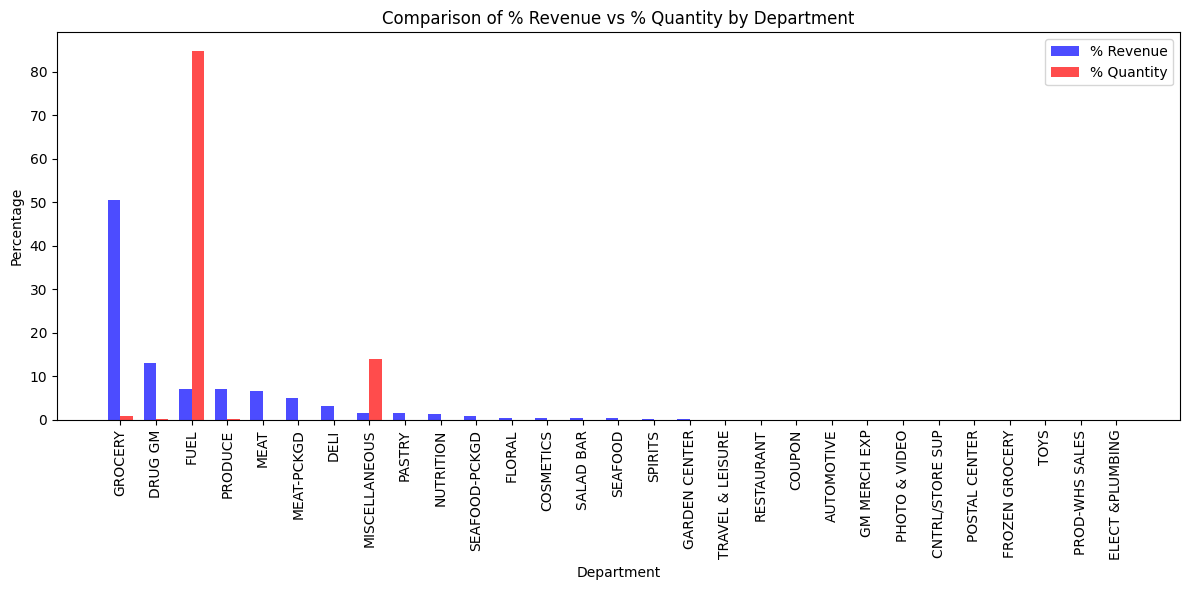

In [163]:
# Group by 'ProductCategory' and calculate the sum of revenue and quantity
grouped = merged_df1.groupby('department').agg({'sales_value': 'sum', 'quantity': 'sum'}).reset_index()

# Calculate the percentage of revenue and quantity within each category
grouped['% Revenue'] = (grouped['sales_value'] / grouped['sales_value'].sum()) * 100
grouped['% Quantity'] = (grouped['quantity'] / grouped['quantity'].sum()) * 100

# Display the result
sorted_grouped = grouped.sort_values(by='% Revenue', ascending=False)

# Round the values in '% Revenue' and '% Quantity' to 2 decimal places
sorted_grouped['% Revenue'] = sorted_grouped['% Revenue'].round(2)
sorted_grouped['% Quantity'] = sorted_grouped['% Quantity'].round(2)

sorted_grouped.reset_index(drop=True, inplace=True)

sorted_grouped['item_price'] = sorted_grouped['sales_value'] / sorted_grouped['quantity']

########################################################################################
############## Plot a Bar graph for % of Revenue and % of Quantity #####################
# Set the width of each bar
bar_width = 0.35

# Create an array of indices for the x-axis
indices = np.arange(len(sorted_grouped))

# Create a figure
plt.figure(figsize=(12, 6))

# Plot % Revenue bars
plt.bar(indices - bar_width / 2, sorted_grouped['% Revenue'], bar_width, label='% Revenue', color='b', alpha=0.7)

# Plot % Quantity bars
plt.bar(indices + bar_width / 2, sorted_grouped['% Quantity'], bar_width, label='% Quantity', color='r', alpha=0.7)

# Set x-axis labels and tick positions
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.title('Comparison of % Revenue vs % Quantity by Department')
plt.xticks(indices, sorted_grouped['department'], rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


__Inference:__
##### Grocery department is generating more than 50% of total revenue we have and the quantity sold is only 0.84% of the total quantities we have in all the stores. There is clearly huge demand for the quantity and hence increase in quantity can yield more revenue.

##### However, Fuel department holds almost 85% of the total quantity we have but only generates 7.18% of the revenue. Hence an increase in sale price can improve the revenue without leading to less purchases as the demand is huge

### 5.2 Get the Departments accounting for the bottom 25% of Revenue

Departments that are generating bottom 25% of revenue
['MEAT', 'MEAT-PCKGD', 'DELI', 'MISCELLANEOUS', 'PASTRY', 'NUTRITION', 'SEAFOOD-PCKGD', 'FLORAL', 'COSMETICS', 'SALAD BAR', 'SEAFOOD', 'SPIRITS', 'GARDEN CENTER', 'TRAVEL & LEISURE', 'RESTAURANT', 'COUPON', 'AUTOMOTIVE', 'TOYS', 'PROD-WHS SALES', 'GM MERCH EXP', 'PHOTO & VIDEO', 'CNTRL/STORE SUP', 'POSTAL CENTER', 'FROZEN GROCERY', 'ELECT &PLUMBING']
<class 'numpy.ndarray'>


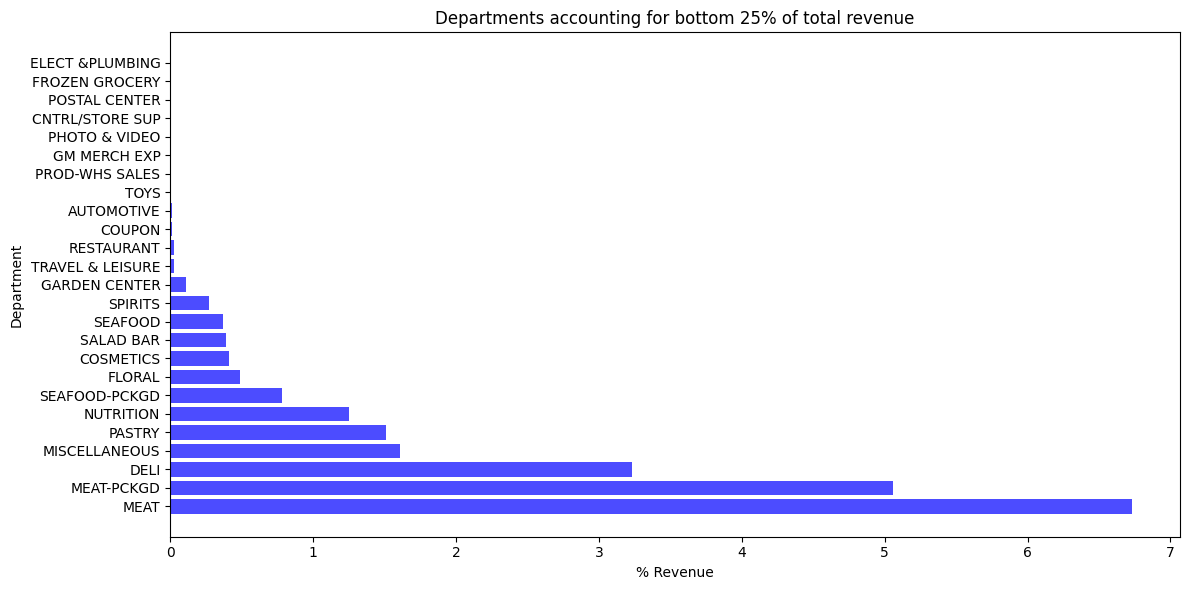

In [83]:
sorted_grouped = sorted_grouped.sort_values(by='% Revenue', ascending=True)

# Initialize variables
cumulative_sum_threshold = 25
cumulative_sum = 0
selected_records = []

# Iterate through the DataFrame until the cumulative sum exceeds the threshold
for _, row in sorted_grouped.iterrows():
    if cumulative_sum + row['% Revenue'] <= cumulative_sum_threshold:
        selected_records.append(row)
        cumulative_sum += row['% Revenue']
    else:
        break

# Create a DataFrame from the selected records
selected_records_df = pd.DataFrame(selected_records)

# Display the selected records
selected_records_df.reset_index(drop=True, inplace=True)

# Draw a Bar graph to show the departments by their % of Revenue
selected_records_df = selected_records_df.sort_values(by='% Revenue', ascending=False)

# Create a bar graph for departments based on % Revenue
plt.figure(figsize=(12, 6))
plt.barh(selected_records_df['department'], selected_records_df['% Revenue'], color='b', alpha=0.7)
plt.xlabel('% Revenue')
plt.ylabel('Department')
plt.title('Departments accounting for bottom 25% of total revenue')
#plt.gca().invert_yaxis()  # Invert y-axis to display the highest % Revenue at the top

plt.tight_layout()

departments_in_sorted_grouped = selected_records_df['department'].unique()

print('Departments that are generating bottom 25% of revenue')
department_list = list(departments_in_sorted_grouped)
print(department_list)

__Inference:__
##### Although meat is thought to be a daily consumption product, it contributes to less that 7% of the total revenue. We can also see that the quantity sold is 0.05% of the total quantities sold. 

### 5.3 Demographic analysis

#### 5.3.1. Age Group and Income Analysis

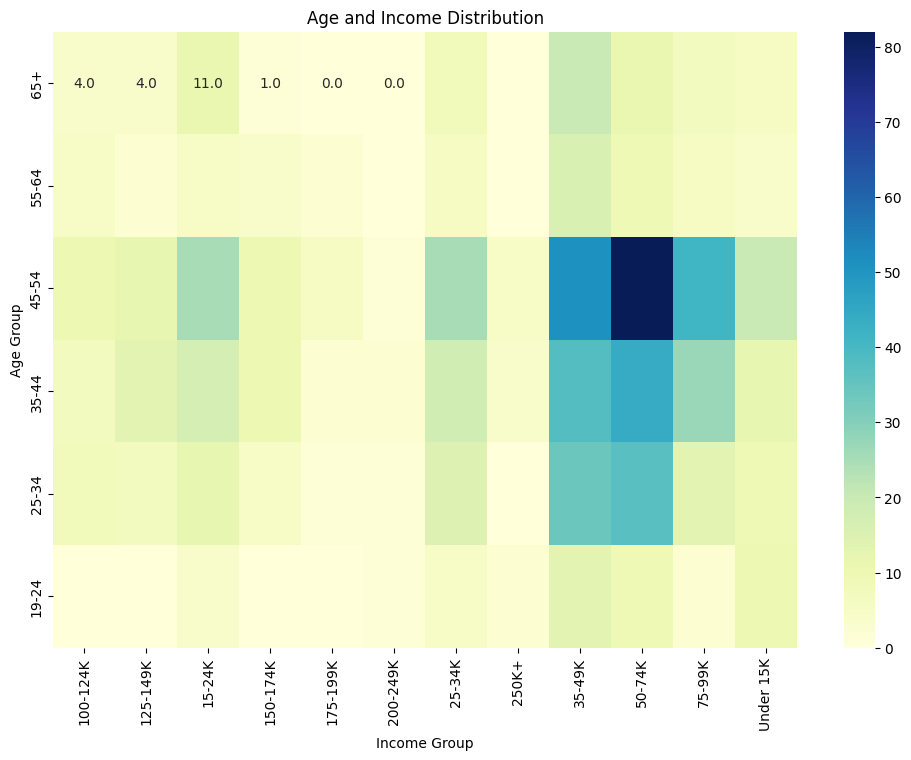

In [166]:
least_25_proportion_departments = merged_df1[merged_df1['department'].isin(departments_in_sorted_grouped)]

# Get the household IDs of households that contributed to the least 25% of revenue
selected_household_ids = least_25_proportion_departments['household_id']

# Merge the selected household IDs with the 'demographics' DataFrame
selected_demographics = demographics_df[demographics_df['household_id'].isin(selected_household_ids)]

# Calculate age and income group counts using groupby
grouped_counts = selected_demographics.groupby(['age', 'income']).size().reset_index(name='count')

# Pivot the table to have age groups as rows and income groups as columns
pivot_table = grouped_counts.pivot(index='age', columns='income', values='count')

# Fill NaN values with 0 (for age groups without certain income groups)
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.sort_values(by='age', ascending=False)

# Reset the index to make 'age_group' a column
pivot_table.reset_index(inplace=True)

# Set the 'age' column as the index
df = pivot_table.set_index('age')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel('Income Group')
plt.ylabel('Age Group')
plt.title('Age and Income Distribution')
plt.show()

__Inference:__
##### The potential targets for the campaigns can be the households of age groups 25-34, 35-44, 45-54 having the income ranges 35K-49K,50K-74K and 75K-99K because they account more for the purchases of the least 25% of product departments.

#### 5.3.2. Analysis by Household Size

Total households for the selected age and income groups :  367

Household distribution for the target age and income groups : 
  household_size  distinct_household_count
0              1                       120
1              2                       135
2              3                        52
3              4                        26
4             5+                        34


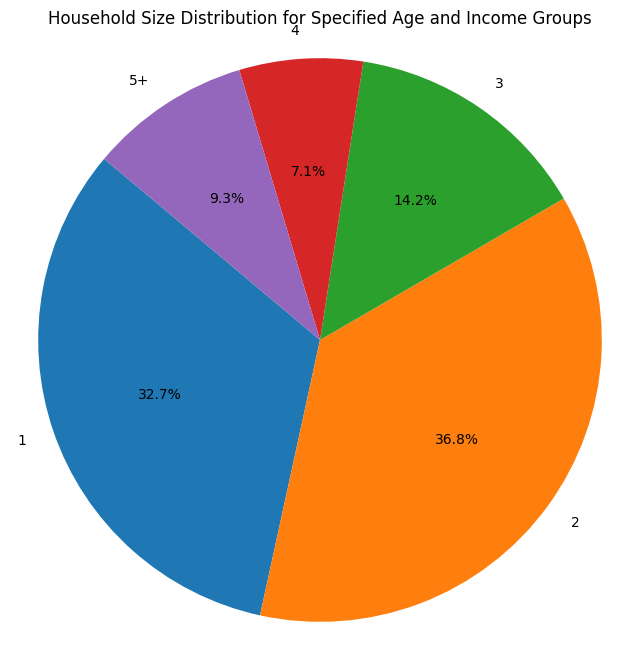

In [94]:
# Define the specified age and income combinations
specified_age_groups = ['25-34', '35-44', '45-54']
specified_income_groups = ['35-49K', '50-74K', '75-99K']

# Filter the 'selected_demographics' DataFrame based on the specified criteria
filtered_households = least_25_proportion_departments[
    (least_25_proportion_departments['age'].isin(specified_age_groups)) &
    (least_25_proportion_departments['income'].isin(specified_income_groups))
]

print("Total households for the selected age and income groups : ", filtered_households['household_id'].nunique())

# Extract and analyze the household sizes in the filtered households
household_size_counts = filtered_households.groupby('household_size')['household_id'].nunique().reset_index()

# Rename the columns for better understanding
household_size_counts.columns = ['household_size', 'distinct_household_count']

# Display the household size distribution for the specified criteria
print("\nHousehold distribution for the target age and income groups : ")
print(household_size_counts)

household_sizes = household_size_counts['household_size']
distinct_household_count = household_size_counts['distinct_household_count']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(distinct_household_count, labels=household_sizes, autopct='%1.1f%%', startangle=140)
plt.title('Household Size Distribution for Specified Age and Income Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

__Inference:__
##### Smaller and medium households sizes are the major contributors in these departments

#### 5.3.3. Marital status and Kids distribution 

   marital_status    kids_count  household_id
0         Married             0            56
1         Married             1            32
2         Married             2            19
3         Married            3+            31
4         Married  None/Unknown            13
5         Unknown             0            46
6         Unknown             1            12
7         Unknown             2             5
8         Unknown            3+             2
9       Unmarried             0           132
10      Unmarried             1            11
11      Unmarried             2             5
12      Unmarried            3+             3


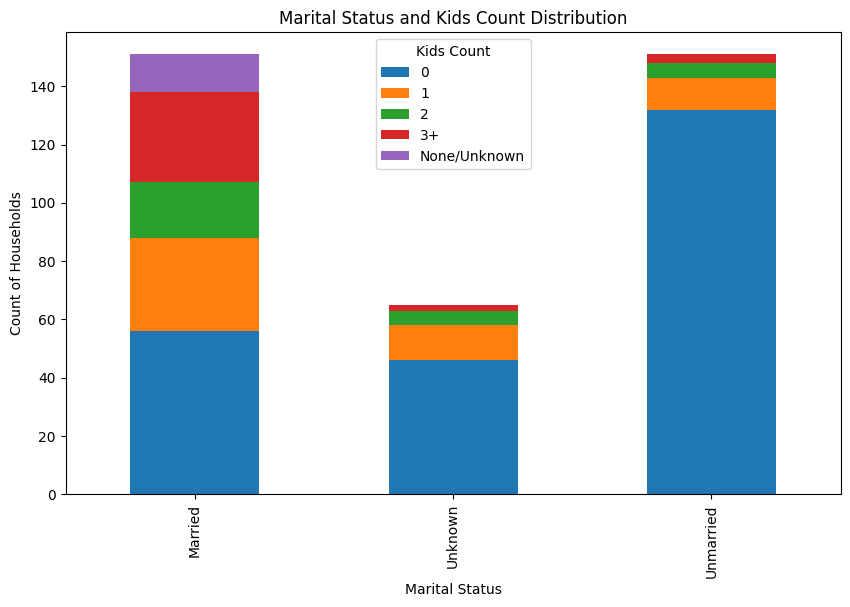

In [95]:
marital_kids_counts = filtered_households.groupby(['marital_status', 'kids_count'])['household_id'].nunique().reset_index()
print(marital_kids_counts)

# Pivot the DataFrame for better visualization
pivot_df = marital_kids_counts.pivot(index='marital_status', columns='kids_count', values='household_id')

# Create a stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set chart labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count of Households')
plt.title('Marital Status and Kids Count Distribution')

# Show the legend
plt.legend(title='Kids Count')

# Show the plot
plt.show()


__Inference:__
##### Married households with 0 or 3+ kids are purchasing the products from these departments. It's better to include them in the campaigns

### 5.4 Impact of Campaign duration

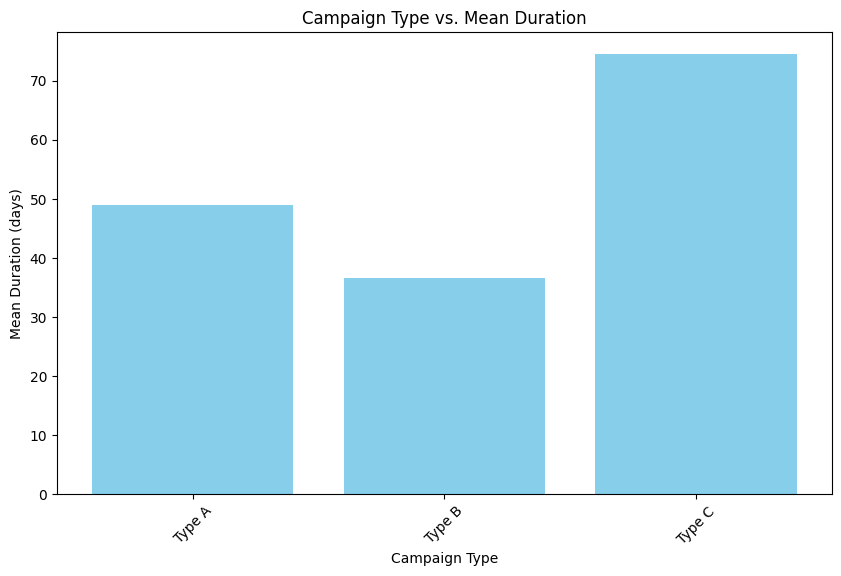

Campaigns that these households participated in:


,campaign_id,campaign_type,duration
0,5,Type B,34
10178,7,Type B,34
20605,8,Type A,48
62498,13,Type A,47
107273,16,Type B,32
121508,18,Type A,55
168042,22,Type B,32
183654,2,Type B,32
185061,14,Type C,65
202359,20,Type C,70


In [167]:
import pandas as pd
from datetime import datetime

# 'campaigns' contains campaign information with 'household_id' and 'campaign_id'.
# 'campaign_descriptions' contains campaign descriptions with 'campaign_id', 'campaign_type', 'start_date', and 'end_date'.

# Merge 'filtered_households' with 'campaigns' based on 'household_id'
merged_data = pd.merge(filtered_households, campaigns_df, on='household_id', how='inner')

# Merge the result with 'campaign_descriptions' based on 'campaign_id'
merged_data = pd.merge(merged_data, campaign_descriptions_df, on='campaign_id', how='inner')

# Parse the date columns from the format "03-03-2017" to datetime objects
merged_data['start_date'] = pd.to_datetime(merged_data['start_date'], format='%d-%m-%Y')
merged_data['end_date'] = pd.to_datetime(merged_data['end_date'], format='%d-%m-%Y')

# Calculate the duration of each campaign
merged_data['duration'] = (merged_data['end_date'] - merged_data['start_date']).dt.days

# Select relevant columns
result_df = merged_data[['campaign_id', 'campaign_type', 'duration']]

# Remove duplicate rows, if any
result_df = result_df.drop_duplicates()

# Group by campaign type and calculate the mean duration for each type
grouped_data = result_df.groupby('campaign_type')['duration'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['campaign_type'], grouped_data['duration'], color='skyblue')
plt.xlabel('Campaign Type')
plt.ylabel('Mean Duration (days)')
plt.title('Campaign Type vs. Mean Duration')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the bar chart
plt.show()

# Display the result
print("Campaigns that these households participated in:")
result_df

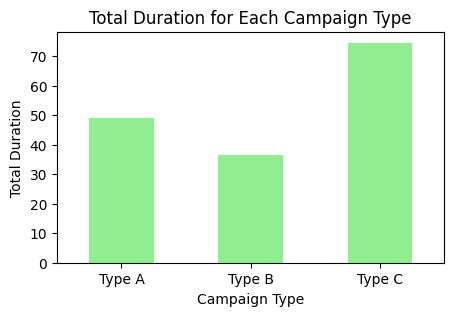

In [172]:
total_durations = grouped_data.groupby('campaign_type')['duration'].sum()

# Plot the total durations for each campaign type
plt.figure(figsize=(5, 3))
total_durations.plot(kind='bar', color='lightgreen')
plt.xlabel('Campaign Type')
plt.ylabel('Total Duration')
plt.title('Total Duration for Each Campaign Type')
plt.xticks(rotation=0)
plt.show()

__Inference:__
##### For the bottom 25% revenue generating households, the Campaign Type C has the longest duration among the three.

Count of unique households that participated in each campaign type :  campaign_type
Type A    335
Type B    255
Type C    127
Name: household_id, dtype: int64


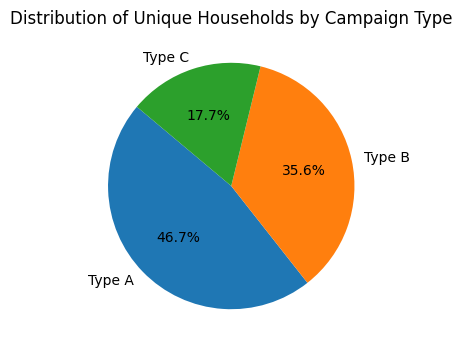

In [176]:
# Assuming you have already merged the data as described in previous responses
# The 'merged_data' DataFrame contains information about households and campaigns

# Filter households that participated in each campaign type
participated_households = merged_data[['household_id', 'campaign_type']]

# Get the count of unique households for each campaign type
unique_households_per_campaign_type = participated_households.drop_duplicates().groupby('campaign_type')['household_id'].count()

# Display the count of unique households for each campaign type
print("Count of unique households that participated in each campaign type : ", unique_households_per_campaign_type)

# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(unique_households_per_campaign_type, labels=unique_households_per_campaign_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Households by Campaign Type')

# Display the pie chart
plt.show()


__Inference:__
##### Even though Campaign type C has the most duration, we can see lesser percentage of the households have participated in Type C campaign. Why is that so?

In [116]:
# Filter households that participated in a "Type C" campaign
type_c_participated_households = merged_data[merged_data['campaign_type'] == 'Type C']

# Get unique households that participated in Type C campaign
unique_type_c_participated_households = type_c_participated_households['household_id'].unique()

# Display the unique households
print("Unique households that participated in Type C campaign:")
print(len(unique_type_c_participated_households))


Unique households that participated in Type C campaign:
127


#### Let's see how the coupon redemptions for filtered households were for type C campaign 

In [182]:
coupon_redemptions_df = pd.read_csv('C:\\Users\\martu\\OneDrive - University of Cincinnati\\Data Wrangling Project Local\\data\\coupon_redemptions.csv')

filtered_coupon_redemptions = coupon_redemptions_df[coupon_redemptions_df['household_id'].isin(unique_type_c_participated_households)]

grouped_campaign_data = filtered_coupon_redemptions.groupby(['campaign_id', 'household_id', 'coupon_upc']).size().reset_index(name='count')

#### Campaigns that included the above households

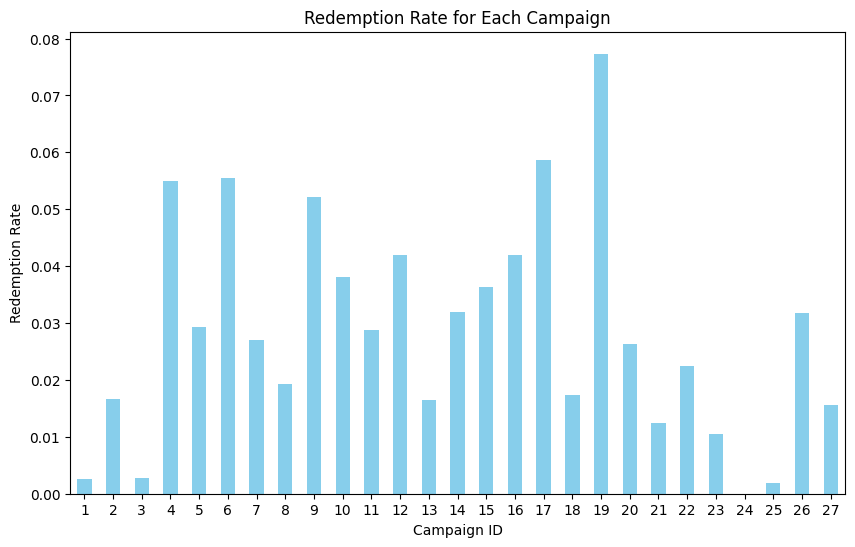

In [190]:
# Calculate the redemption rate for each campaign
campaign_redemptions = coupon_redemptions_df.groupby('campaign_id')['coupon_upc'].count()
campaign_coupons = coupons_df.groupby('campaign_id')['coupon_upc'].count()
redemption_rate = campaign_redemptions / campaign_coupons

# Plot the redemption rate for each campaign
plt.figure(figsize=(10, 6))
redemption_rate.plot(kind='bar', color='skyblue')
plt.xlabel('Campaign ID')
plt.ylabel('Redemption Rate')
plt.title('Redemption Rate for Each Campaign')
plt.xticks(rotation=0)
plt.show()


### Coupon Usage and redemption comparison for all the Campaigns

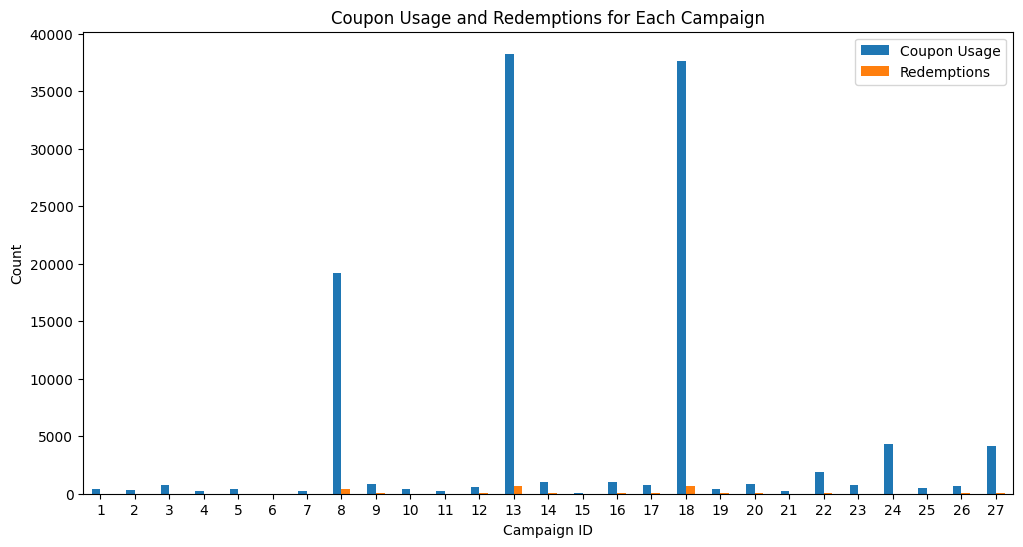

In [196]:
# Evaluate coupon usage for each campaign
coupon_usage_per_campaign = coupons_df.groupby('campaign_id')['coupon_upc'].count()


# Merge coupon usage and campaign redemptions into a single DataFrame
campaign_effectiveness = pd.concat([coupon_usage_per_campaign, campaign_redemptions], axis=1)
campaign_effectiveness.columns = ['Coupon Usage', 'Redemptions']

# Plot coupon usage and redemptions side by side for each campaign
ax = campaign_effectiveness.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Campaign ID')
plt.ylabel('Count')
plt.title('Coupon Usage and Redemptions for Each Campaign')
plt.xticks(rotation=0)
plt.legend(['Coupon Usage', 'Redemptions'])
plt.show()

#### Lets see the total sale value, coupon disc and other metrics for the type c campaigns with the target households participated 

In [191]:
# Select desired columns from merged_data
selected_columns = [
    'campaign_id', 'campaign_type', 'start_date', 'end_date', 'duration',
    'retail_disc', 'coupon_disc', 'coupon_match_disc',
    'quantity', 'sales_value',
]
campaign_data = type_c_participated_households[selected_columns]

In [192]:
# Group by the specified columns and calculate the sum
grouped_campaign_data = campaign_data.groupby(['campaign_id', 'campaign_type', 'start_date', 'end_date', 'duration']).agg({
    'retail_disc': 'sum',
    'coupon_disc': 'sum',
    'coupon_match_disc': 'sum',
    'quantity': 'sum',
    'sales_value': 'sum'
}).reset_index()


In [193]:
sorted_campaign_data = grouped_campaign_data.sort_values(by='coupon_disc', ascending=True)

In [194]:
sorted_campaign_data

,campaign_id,campaign_type,start_date,end_date,duration,retail_disc,coupon_disc,coupon_match_disc,quantity,sales_value
5,24,Type C,2016-11-14,2017-01-16,63,535.80,0.75,0.25,642,2351.76
3,15,Type C,2017-09-20,2018-02-28,161,908.93,4.80,2.80,18205,3263.76
0,3,Type C,2017-03-13,2017-05-08,56,851.47,8.40,1.40,935,3192.52
1,6,Type C,2017-04-19,2017-05-21,32,3655.37,53.61,11.45,95918,22790.75
2,14,Type C,2017-09-04,2017-11-08,65,17003.89,207.46,38.09,260169,80279.37
4,20,Type C,2017-11-27,2018-02-05,70,18107.33,234.94,40.80,904032,82251.37


### Lets compare the sale value and the coupon discount for all these 6 campaigns

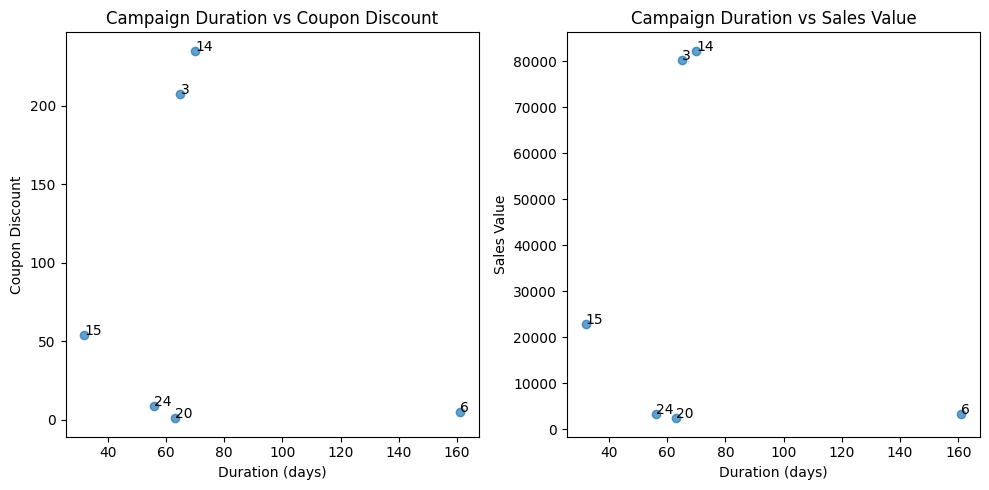

In [195]:
# Extract relevant columns
campaign_id = sorted_campaign_data['campaign_id']
duration = sorted_campaign_data['duration']
coupon_disc = sorted_campaign_data['coupon_disc']
sales_value = sorted_campaign_data['sales_value']

# Create a scatter plot for campaign duration vs coupon discount
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(duration, coupon_disc, alpha=0.7)
plt.title('Campaign Duration vs Coupon Discount')
plt.xlabel('Duration (days)')
plt.ylabel('Coupon Discount')

# Annotate data points with campaign ID
for i, txt in enumerate(campaign_id):
    plt.annotate(txt, (duration[i], coupon_disc[i]))

# Create a scatter plot for campaign duration vs sales value
plt.subplot(1, 2, 2)
plt.scatter(duration, sales_value, alpha=0.7)
plt.title('Campaign Duration vs Sales Value')
plt.xlabel('Duration (days)')
plt.ylabel('Sales Value')

# Annotate data points with campaign ID
for i, txt in enumerate(campaign_id):
    plt.annotate(txt, (duration[i], sales_value[i]))

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

__Inference :__ 
Campaing id 6 has taken a duration of 160 days but generated the least sale value and coupon discount while campaign id 14 has generated more sale value with less duration

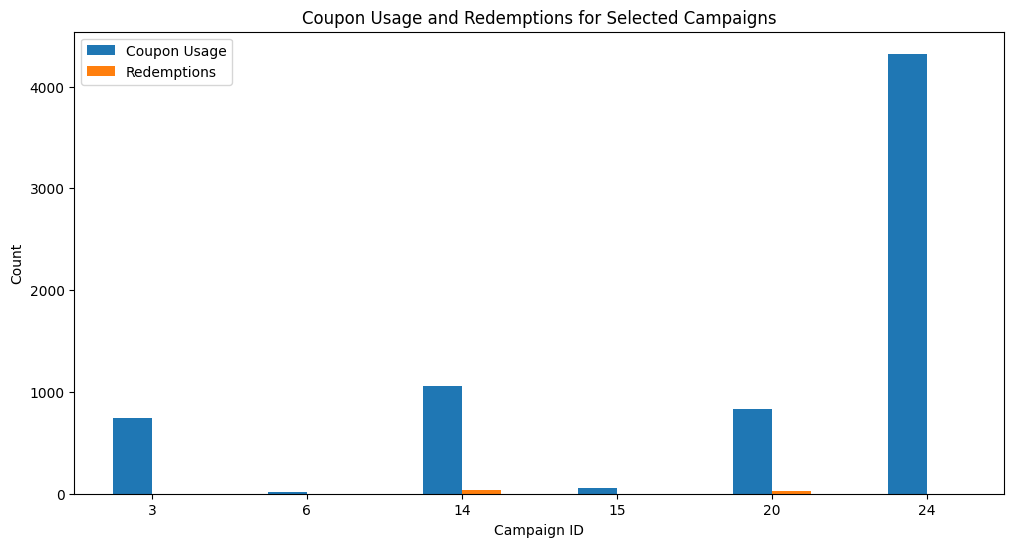

In [200]:
# Extract campaign IDs from sorted_campaign_data
selected_campaign_ids = sorted_campaign_data['campaign_id']

# Filter coupons_df to include only rows with campaign IDs in selected_campaign_ids
filtered_coupons_df = coupons_df[coupons_df['campaign_id'].isin(selected_campaign_ids)]

# Evaluate coupon usage for each campaign
coupon_usage_per_campaign = filtered_coupons_df.groupby('campaign_id')['coupon_upc'].count()

# Merge coupon usage and campaign redemptions into a single DataFrame
campaign_effectiveness = pd.concat([coupon_usage_per_campaign, campaign_redemptions], axis=1)
campaign_effectiveness.columns = ['Coupon Usage', 'Redemptions']

# Filter the DataFrame to include only selected campaigns
campaign_effectiveness = campaign_effectiveness[campaign_effectiveness.index.isin(selected_campaign_ids)]

# Plot coupon usage and redemptions side by side for each campaign
ax = campaign_effectiveness.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Campaign ID')
plt.ylabel('Count')
plt.title('Coupon Usage and Redemptions for Selected Campaigns')
plt.xticks(rotation=0)

plt.legend(['Coupon Usage', 'Redemptions'])
plt.show()

__Inference :__
While all these campaigns require more attention to target the age groups 25-34, 35-44, and 45-54 with income ranges of 35K-49K, 50K-74K, and 75K-99K, it's worth noting that campaign IDs 6, 20, and 24 require additional attention. Despite being allocated more days for the campaign, they are generating less sales value.

### 6. Summary

The analysis aims to assess the effectiveness of Campaigns for departments contributing to the bottom 25% of revenue at Regork. By utilizing historical sales and campaign data, the methodology involves identifying low-revenue departments, collecting pertinent data, filtering for households associated with these departments and Campaign Type C participation, and analyzing participation and redemption rates. The analysis also assesses the campaign's impact on sales within these departments. The insights gained provide critical information to the Regork CEO, enabling data-driven decision-making. If the campaign proves effective, reallocating resources or replicating strategies in underperforming departments is recommended.

Limitations include a lack of causal inference, reliance on historical data, and external factors influencing sales. Potential improvement lies in incorporating external datasets. These datasets could include economic indicators, market trends, competitor data, or customer sentiment analysis. By correlating campaign performance with external factors, it becomes possible to pinpoint the specific drivers of success or failure. For instance, identifying that the campaign performs better during certain economic conditions or in response to specific market trends could lead to more targeted and effective marketing strategies. 